In [1]:
from run_kinfit import run_kinfit
from draw_funcs import draw_1d_hist, draw_1d_hists, vertices_plot2, draw_2d_hist, draw_scatter
from ROOT import TFile, TCanvas
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/08


In [2]:
input_path = "/var/kinfit/data/tr_ph_run049912.root"
output_path = "kinfit_kskpi_run049912.root"

In [3]:
run_kinfit(input_path, output_path=output_path, mfield=1.0)

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

(int) 0
(TFile &) Name: /var/kinfit/data/tr_ph_run049912.root Title: 
(TrPh &) @0x7f4f12702000
 [STATUS : 01%]	CPU TIME: 5.890	REAL TIME: 5.888
 [STATUS : 02%]	CPU TIME: 5.290	REAL TIME: 5.289
 [STATUS : 03%]	CPU TIME: 6.440	REAL TIME: 6.437
 [STATUS : 04%]	CPU TIME: 4.910	REAL TIME: 4.899
 [STATUS : 05%]	CPU TIME: 5.030	REAL TIME: 5.030
 [STATUS : 06%]	CPU TIME: 5.320	REAL TIME: 5.308
 [STATUS : 07%]	CPU TIME: 5.370	REAL TIME: 5.375
 [STATUS : 08%]	CPU TIME: 5.720	REAL TIME: 5.720
 [STATUS : 09%]	CPU TIME: 5.030	REAL TIME: 5.021
 [STATUS : 10%]	CPU TIME: 5.870	REAL TIME: 5.858
 [STATUS : 11%]	CPU TIME: 5.830	REAL TIME: 5.840
 [STATUS : 12%]	CPU TIME: 5.670	REAL TIME: 5.668
 [STATUS : 13%]	CPU TIME: 5.830	REAL TIME: 5.821
 [STATUS : 14%]	CPU TIME: 5.480	REAL TIME: 5.494
 [STATUS : 15%]	CPU TIME: 5.500	REAL TIME: 5.497
 [STATUS : 16%]	CPU TIME: 5.380	REAL TIME: 5.388
 [STATUS : 17%]	CPU TIME: 6.200	REAL TIME: 6.206
 [STATUS : 18%]	CPU TIME: 5.800	REAL TIME: 5.797
 [STATUS : 19%]	CPU TIM

Info in <TUnixSystem::ACLiC>: creating shared library /home/hep/workdir/notebooks/KsKpi_cmd3_ksminv/TrPh_C.so


In [4]:
fl = TFile.Open(output_path, 'read')

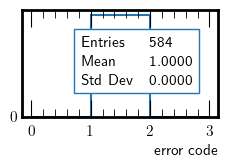

In [5]:
fl.kf_data.Draw("kf_err>>kf_err_kskpi(3,0,3)", "kf_err==1", "goff")
draw_1d_hist("kf_err_kskpi", xlabel='error code', 
             fraction=0.47,
             info_coords=(0.3, 0.3),
            h_y=5000, h_x=1)
plt.savefig('kf_err_xkpi.eps')

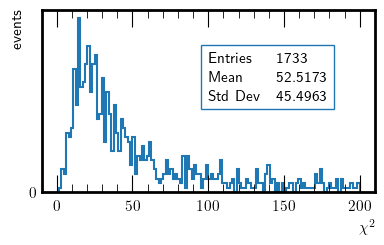

In [37]:
fl.kf_data.Draw("kf_chi2>>kf_chi2_kskpi(128,0,200)", "kf_err==0 && nks==0", "goff")
draw_1d_hist("kf_chi2_kskpi", 
             xlabel=r'$\chi^2$',
             ylabel='events',
             fraction=0.8,
             info_coords=(0.5,0.5),
            h_y=200, h_x=50)
plt.savefig('kf_chi2_xkpi.eps')

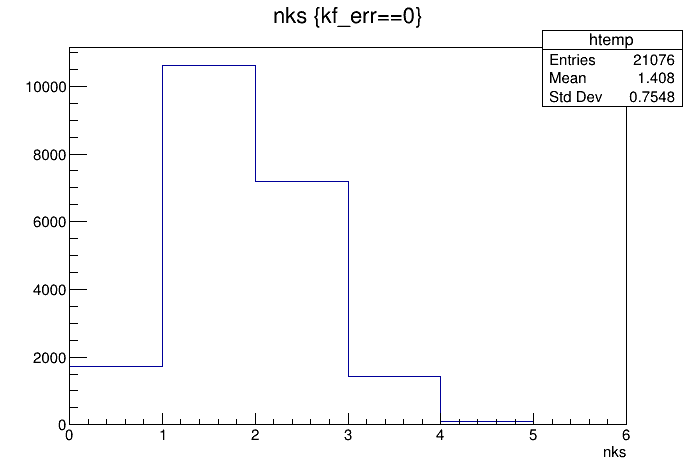

In [36]:
c2 = TCanvas()
fl.kf_data.Draw("nks", "kf_err==0")
c2.Draw()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


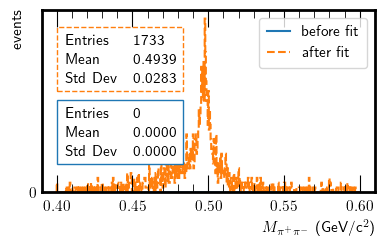

In [33]:
fl.kf_data.Draw("in_mks>>in_mks(512,0.4,0.6)", "kf_err==0 && nks==0 ", "goff")
fl.kf_data.Draw("kf_mks>>kf_mks(512,0.4,0.6)", "kf_err==0 && nks==0", "goff")
fl.kf_data.Draw("1.e-3* ksminv[0]>>ksminv(512,0.4,0.6)", "kf_err==0 && nks==0", "goff")
draw_1d_hists([('ksminv', 'before fit'), ('kf_mks', 'after fit')], 
              xlabel=r'$M_{\pi^+\pi^-}$ (GeV/c$^2$)',
              ylabel='events',
              fraction=0.8,
              fontsize=11,
             info_coords=(0.07, 0.2),
              dh=0.4,
             h_y=200, h_x=0.05)
plt.savefig('kf_mks_xkpi.eps', bbox_inches='tight')

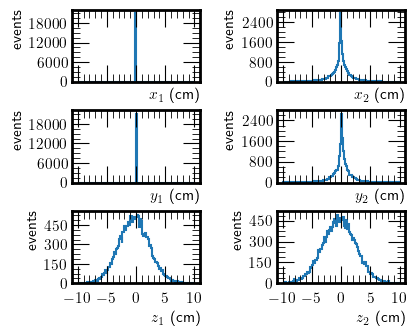

In [9]:
fl.kf_data.Draw("kf_vtx0[0]>>kf_vtx0_x(128, -10, 10)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_vtx0[1]>>kf_vtx0_y(128, -10, 10)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_vtx0[2]>>kf_vtx0_z(128, -10, 10)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_vtx1[0]>>kf_vtx1_x(128, -10, 10)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_vtx1[1]>>kf_vtx1_y(128, -10, 10)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_vtx1[2]>>kf_vtx1_z(128, -10, 10)", "kf_err==0", "goff")
vertices_plot2([['kf_vtx0_x', 'kf_vtx1_x'], 
               ['kf_vtx0_y', 'kf_vtx1_y'],
               ['kf_vtx0_z', 'kf_vtx1_z']],
               fraction=0.8, 
               hspace=0.4, 
               wspace=0.6,
              hs_y=[[6000, 800], [6000, 800], [150, 150]],
              hs_x=[[5, 5], [5, 5], [5, 5]])
plt.savefig('kf_vtx_xkpi.eps')

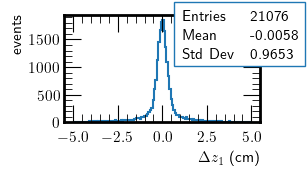

In [10]:
fl.kf_data.Draw("kf_vtx0[2]-sim_ee_vtx[2]>>kf_vtx_dz1(128, -5, 5)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx_dz1", 
             xlabel=r'$\Delta z_{1}$ (cm)',
             ylabel='events',
            fraction=0.47,
            info_coords=(0.6, 0.6),
           h_y=500, h_x=2.5)
plt.savefig('kf_vtx_dz1_xkpi.eps', bbox_inches='tight')

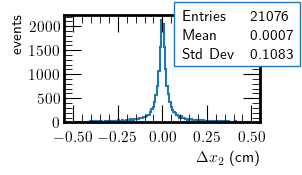

In [11]:
fl.kf_data.Draw("kf_vtx1[0]-sim_ks_vtx[0]>>kf_vtx_dx2(128, -0.5, 0.5)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx_dx2", 
             xlabel=r'$\Delta x_{2}$ (cm)',
             ylabel='events',
            fraction=0.47,
            info_coords=(0.6, 0.6),
            h_y=500, h_x=0.25)
plt.savefig('kf_vtx_dx2_xkpi.eps', bbox_inches='tight')

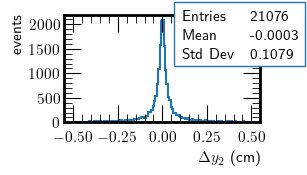

In [12]:
fl.kf_data.Draw("kf_vtx1[1]-sim_ks_vtx[1]>>kf_vtx_dy2(128, -0.5, 0.5)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx_dy2", 
             xlabel=r'$\Delta y_{2}$ (cm)',
             ylabel='events',
            fraction=0.47,
            info_coords=(0.6, 0.6),
            h_y=500, h_x=0.25)
plt.savefig('kf_vtx_dy2_xkpi.eps', bbox_inches='tight')

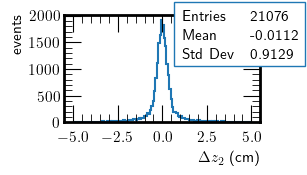

In [13]:
fl.kf_data.Draw("kf_vtx1[2]-sim_ks_vtx[2]>>kf_vtx_dz2(128, -5., 5.)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx_dz2", 
             xlabel=r'$\Delta z_{2}$ (cm)',
             ylabel='events',
            fraction=0.47,
            info_coords=(0.6, 0.6),
            h_y=500, h_x=2.5)
plt.savefig('kf_vtx_dz2_xkpi.eps', bbox_inches='tight')

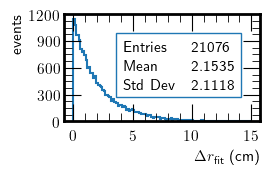

In [14]:
fl.kf_data.Draw("kf_vtx_dr>>kf_vtx_dr(128, 0, 15)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx_dr", 
             xlabel=r'$\Delta r_{\text{fit}}$ (cm)',
             ylabel='events',
             fraction=0.47, 
            info_coords=(0.3, 0.3),
            h_y=300, h_x=5)
plt.savefig('kf_vtx_dr_xkpi.eps')

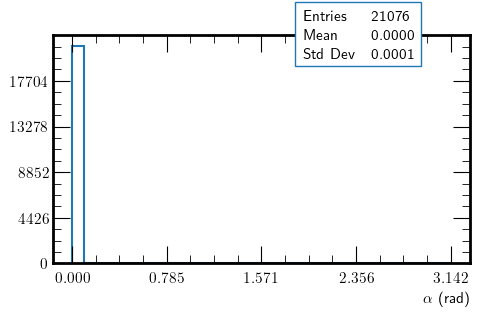

In [15]:
fl.kf_data.Draw("kf_ks_decay_prod_angle>>kf_angle(32, 0, 3.14159)", "kf_err==0", "goff")
draw_1d_hist("kf_angle", xlabel=r'$\alpha$ (rad)')
plt.savefig('kf_ks_prod_angle_xkpi.eps')

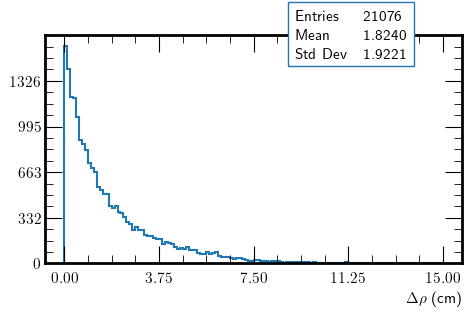

In [16]:
fl.kf_data.Draw("kf_vtx_drho>>kf_vtx_drho(128, 0, 15)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx_drho", xlabel=r'$\Delta\rho$ (cm)')
plt.savefig('kf_vtx_drho_xkpi.eps')

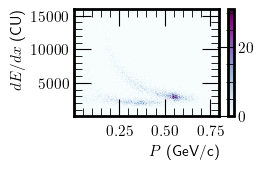

In [17]:
fl.kf_data.Draw("kf_dedx_vtx0_K:kf_p_vtx0_K>>pdedx_K(256, 0, 0.8, 256, 0, 16000)", "kf_err==0", "goff")
draw_2d_hist('pdedx_K', xlabel=r'$P$ (GeV/c)', ylabel=r'$dE/dx\text{ (CU)}$',
            fraction=0.47)
plt.savefig('kf_dedx_p_K_from_vtx0_xkpi.eps')

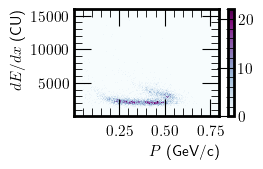

In [18]:
fl.kf_data.Draw("kf_dedx_vtx0_pi:kf_p_vtx0_pi>>pdedx_vtx0_pi(256, 0, 0.8, 256, 0, 16000)", "kf_err==0", "goff")
draw_2d_hist('pdedx_vtx0_pi', xlabel=r'$P$ (GeV/c)', ylabel=r'$dE/dx\text{ (CU)}$',
            fraction=0.47)
plt.savefig('kf_dedx_p_pi_from_vtx0_xkpi.eps')

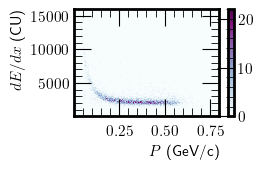

In [19]:
fl.kf_data.Draw("kf_dedx_vtx1_pi[0]:kf_p_vtx1_pi[0]>>pdedx_vtx1_pi(256, 0, 0.8, 256, 0, 16000)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_dedx_vtx1_pi[1]:kf_p_vtx1_pi[1]>>+pdedx_vtx1_pi(256, 0, 0.8, 256, 0, 16000)", "kf_err==0", "goff")
draw_2d_hist('pdedx_vtx1_pi', xlabel=r'$P$ (GeV/c)', ylabel=r'$dE/dx\text{ (CU)}$',
            fraction=0.47)
plt.savefig('kf_dedx_p_pi_from_vtx1_xkpi.eps')

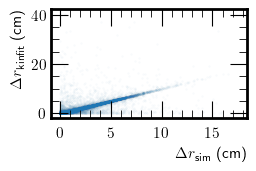

In [20]:
fl.kf_data.Draw(">>elist", "kf_err==0", "entryList")
draw_scatter('kf_data', 'elist', 'sim_vtx_dr', 'kf_vtx_dr', 
             xlabel=r'$\Delta r_{\text{sim}}$ (cm)', 
             ylabel=r'$\Delta r_{\text{kinfit}}$ (cm)', 
             fraction=0.47)
plt.savefig('kf_sim_vs_kf_dr_xkpi.eps')

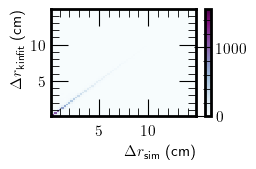

In [21]:
fl.kf_data.Draw("sim_vtx_dr:kf_vtx_dr>>sim_kf_vtx_dr(64, 0, 15., 64, 0, 15.)", "kf_err==0", "goff")
draw_2d_hist('sim_kf_vtx_dr', 
            xlabel=r'$\Delta r_{\text{sim}}$ (cm)', 
            ylabel=r'$\Delta r_{\text{kinfit}}$ (cm)',
            fraction=0.47)
plt.savefig('kf_sim_vs_kf_dr_colormap_xkpi.eps')

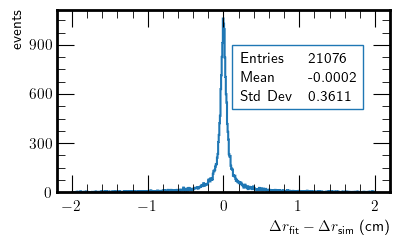

In [22]:
fl.kf_data.Draw("(kf_vtx_dr-sim_vtx_dr)>>kf_delta_dr(512, -2, 2)", "kf_err==0", "goff")
draw_1d_hist("kf_delta_dr", 
             xlabel=r'$\Delta r_{\text{fit}}-\Delta r_{\text{sim}}$ (cm)',
             ylabel='events',
            fraction=0.8,
            info_coords=(0.55, 0.5),
            h_y=300, h_x=1)
plt.savefig('kf_sim_vs_kf_dr_1d_xkpi.eps')

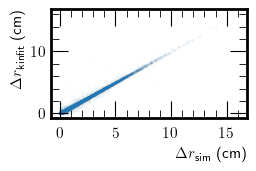

In [23]:
fl.kf_data.Draw(">>elist", "kf_err==0 && kf_chi2<100", "entryList")
draw_scatter('kf_data', 'elist', 'sim_vtx_dr', 'kf_vtx_dr', 
             xlabel=r'$\Delta r_{\text{sim}}$ (cm)', 
             ylabel=r'$\Delta r_{\text{kinfit}}$ (cm)',
            fraction=0.47)
plt.savefig('kf_sim_vs_kf_dr_chi2_100_xkpi.eps')

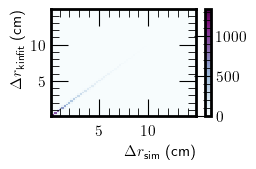

In [24]:
fl.kf_data.Draw("sim_vtx_dr:kf_vtx_dr>>sim_kf_vtx_dr_100(64, 0, 15., 64, 0, 15.)", 
                "kf_err==0 && kf_chi2<100", "goff")
draw_2d_hist('sim_kf_vtx_dr_100', 
            xlabel=r'$\Delta r_{\text{sim}}$ (cm)', 
            ylabel=r'$\Delta r_{\text{kinfit}}$ (cm)',
            fraction=0.47)
plt.savefig('kf_sim_vs_kf_dr_chi2_100_colormap_xkpi.eps')

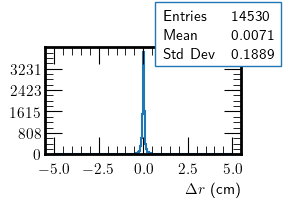

In [25]:
fl.kf_data.Draw("(kf_vtx_dr-sim_vtx_dr)>>kf_delta_dr_100(256, -5, 5)", 
                "kf_err==0 && kf_chi2<100", "goff")
draw_1d_hist("kf_delta_dr_100", xlabel=r'$\Delta r$ (cm)',
            fraction=0.47)
plt.savefig('kf_sim_vs_kf_dr_chi2_100_1d_xkpi.eps')

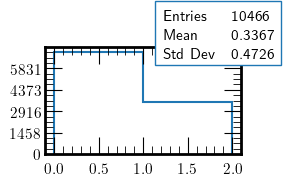

In [26]:
fl.kf_data.Draw("kf_hypo>>kf_hypo_sim0", 
                "kf_err==0 && sim_hypo==0", "goff")
draw_1d_hist("kf_hypo_sim0", xlabel=r'',
            fraction=0.47)
plt.savefig('kf_hypo_kskplpimi_xkpi.eps', bbox_inches='tight')

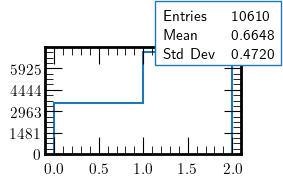

In [27]:
fl.kf_data.Draw("kf_hypo>>kf_hypo_sim1", 
                "kf_err==0 && sim_hypo==1", "goff")
draw_1d_hist("kf_hypo_sim1", xlabel=r'',
            fraction=0.47)
plt.savefig('kf_hypo_kskmipipl_xkpi.eps', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


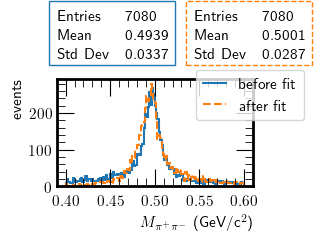

In [28]:
fl.kf_data.Draw("in_mks>>in_mks(128,0.4,0.6)", "kf_err==0 && kf_hypo==1 && sim_hypo==0", "goff")
fl.kf_data.Draw("in_mks>>+in_mks", "kf_err==0 && kf_hypo==0 && sim_hypo==1", "goff")
fl.kf_data.Draw("kf_mks>>kf_mks(128,0.4,0.6)", "kf_err==0 && kf_hypo==1 && sim_hypo==0", "goff")
fl.kf_data.Draw("kf_mks>>+kf_mks", "kf_err==0 && kf_hypo==0 && sim_hypo==1", "goff")
draw_1d_hists([('in_mks', 'before fit'), ('kf_mks', 'after fit')], 
              xlabel=r'$M_{\pi^+\pi^-}$ (GeV/c$^2$)',
              ylabel='events',
             fraction=0.47,
             info_coords=(0.0, 1.2),
            dh=0.0,
             dw=0.7,
             legend_loc='center right',
             bbox_to_anchor=(0.9, 0.6, 0.4, 0.5),
             h_y=100, h_x=0.05)
plt.savefig('kf_mks_wrong_xkpi.eps', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


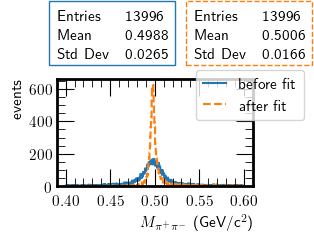

In [29]:
fl.kf_data.Draw("in_mks>>in_mks1(512,0.4,0.6)", "kf_err==0 && kf_hypo==0 && sim_hypo==0", "goff")
fl.kf_data.Draw("in_mks>>+in_mks1", "kf_err==0 && kf_hypo==1 && sim_hypo==1", "goff")
fl.kf_data.Draw("kf_mks>>kf_mks1(512,0.4,0.6)", "kf_err==0 && kf_hypo==0 && sim_hypo==0", "goff")
fl.kf_data.Draw("kf_mks>>+kf_mks1", "kf_err==0 && kf_hypo==1 && sim_hypo==1", "goff")
draw_1d_hists([('in_mks1', 'before fit'), ('kf_mks1', 'after fit')], 
              xlabel=r'$M_{\pi^+\pi^-}$ (GeV/c$^2$)',
              ylabel='events',
             fraction=0.47,
             info_coords=(0.0, 1.2),
            dh=0.0,
             dw=0.7,
             legend_loc='center right',
             bbox_to_anchor=(0.9, 0.6, 0.4, 0.5),
             h_y=200, h_x=0.05)
plt.savefig('kf_mks_good_xkpi.eps', bbox_inches='tight')

In [30]:
# fl.Close()